In [3]:
import numpy as np
import cv2
import os
from torchvision import transforms
import glob
import warnings
import  matplotlib.pyplot as plt
import copy

**1. 从视频文件中截取两张位置相邻的图片。提示：使用cv2.imread()函数读取一段视频文件。将两幅图片做差后取绝对值，显示讲第1张、第2张图片做差后的图像，讨论能否用此算法进行视频监控，发现场景中的异常情况，会遇到哪些问题？**

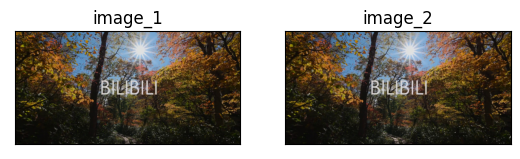

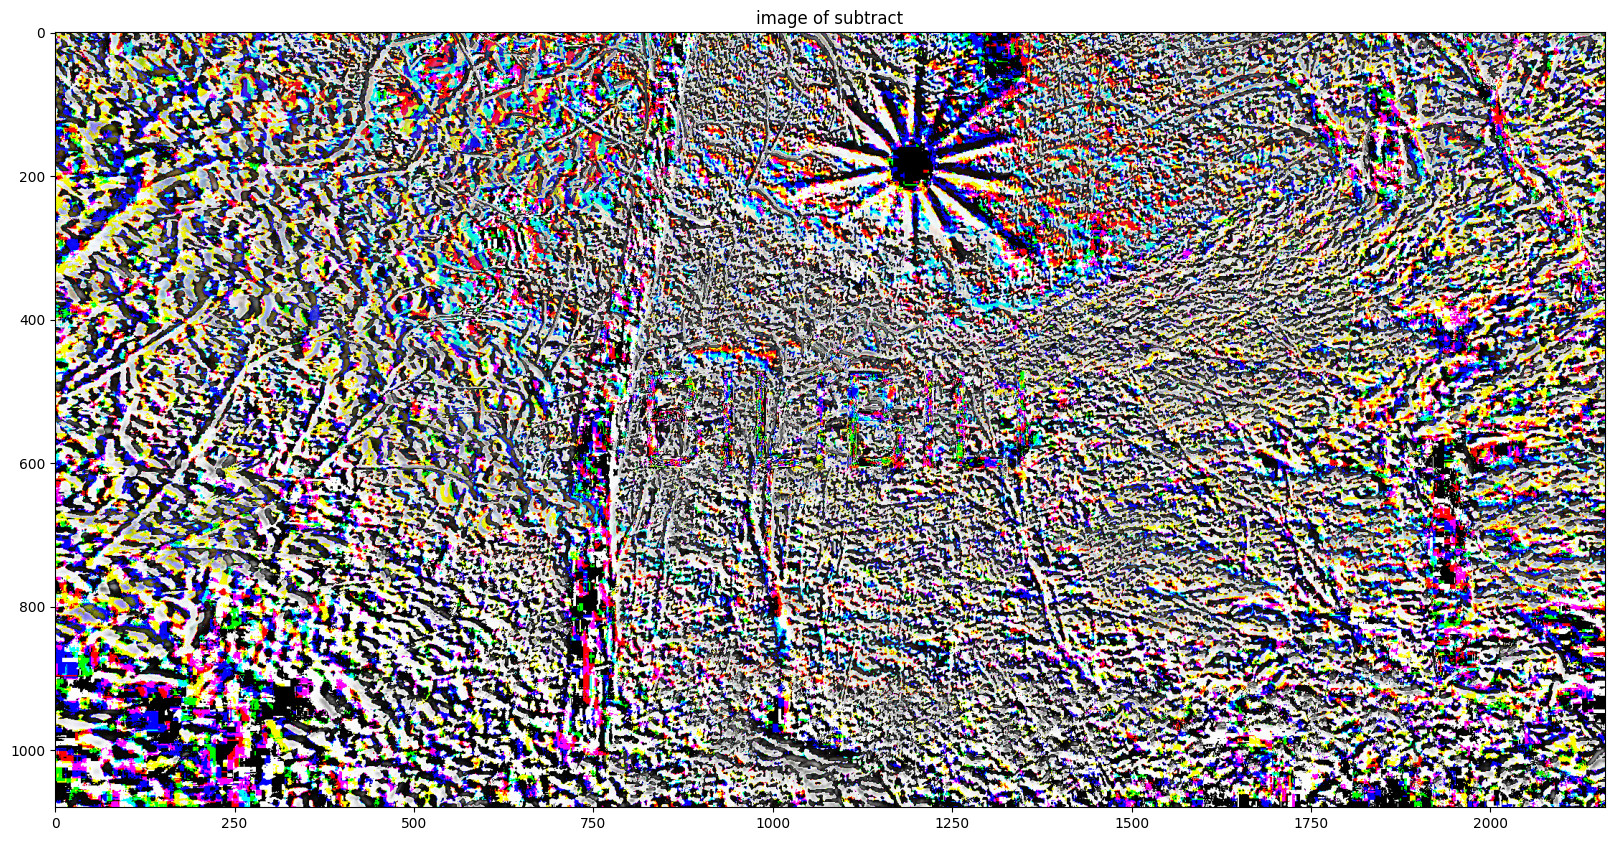

In [9]:
path = '/data0/hwl_data/FGVC/CUB-1/train/001.Black_footed_Albatross/Black_Footed_Albatross_0003_796136.jpg'
video_path = 'vedio.mp4'
def readvideo(video_path):
    r"""读取视频，并将视频进行切分
    """
    i =1
    capture = cv2.VideoCapture(video_path)
    if capture.isOpened():
        while True:
            ret,img = capture.read()
            # cv2.imshow()
            #print(img.shape)
            if ret :
                print('开始截取视频第{}帧'.format(i))
            if(i!=10):
                cv2.imwrite("./capture_image/"+str(i)+'.jpg',img)
                i+=1
            else:
                break
            if not ret :break
    else:
        print("open vedio failed!")
# readvideo(video_path)
# 展示两张照片
img_path = ['/home/yy/Digital Image/69.jpg',"/home/yy/Digital Image/70.jpg"]
img_title = ['image_1','image_2']

for i in range(2):  
    plt.subplot(1,2,i+1)
    plt.imshow(cv2.imread(img_path[i])[:,:,::-1])
    plt.title(img_title[i])
    plt.xticks([]),plt.yticks([])

# img_subtract = cv2.imread(img_path[0])[:,:,::-1]-cv2.imread(img_path[1])[:,:,::-1]
# plt.figure(figsize=(20,40))
# plt.title('image of subtract')
# plt.imshow(img_subtract)

**2. 将两张彩色图片$A, B$使用加法运算进行融合，融合后的图像$C = \alpha A + (1-\alpha)B $ 其中 $0\leq \alpha\leq 1$。 改变参数$\alpha$，分析融合后图片$C$的变化。**

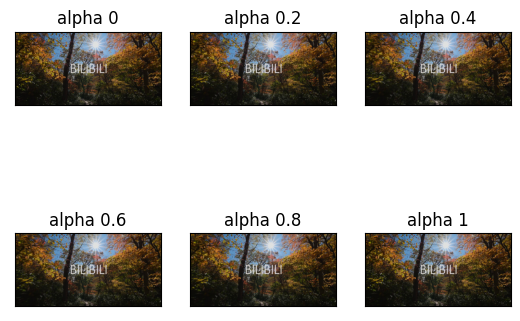

In [10]:
alph = [0,0.2,0.4,0.6,0.8,1]
def img_concat(img_1,img_2,alph):
    img = []
    for i in alph:
        img.append(i*img_1+(1-i)*img_2)
    return img

def draw_image(row,col,img_list,title_list):
    for i in range(col*row):
        plt.subplot(row,col,i+1)
        plt.imshow(img_list[i]/255)
        plt.title(title_list[i])
        plt.xticks([]),plt.yticks([])

img_add  = img_concat(cv2.imread(img_path[0])[:,:,::-1],cv2.imread(img_path[1])[:,:,::-1],alph)
title= ['alpha '+str(i) for i in alph]

draw_image(int(len(alph)/3),3,img_add,title)   

**3. 选择的一张图片使用Gamma函数对图像进行算法实验，验证通过设置不同的参数$\gamma = 0.5,1.5,2.5$，分别增强了图像中的哪些信息，并讨论讨论增强后的效果**

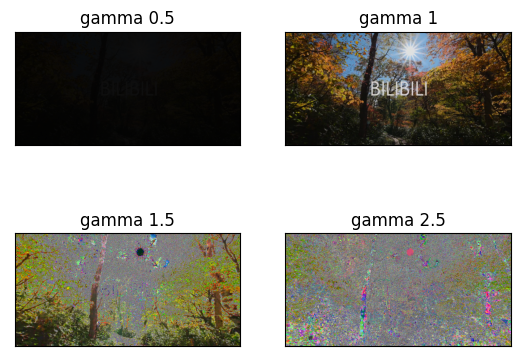

In [33]:
gamma_=[0.5,1,1.5,2.5]

def gamma(img,c,gam):
    lut = np.zeros(256,dtype=np.float32)
    img_ =[]
    for g in gam:
        for i in range(256):
            lut[i] = c*i**g
        output_img = cv2.LUT(img,lut)
        output_img = np.uint8(output_img+0.5)
        img_.append(output_img)
    return img_
gamma_title = ['gamma '+ str(i) for i in gamma_]
img_gramm = gamma(cv2.imread(img_path[0])[:,:,::-1],1,gamma_)
draw_image(2,2,img_gramm,gamma_title)

**4.尝试使用log变换来对图像中的信息进行增强。对比增强前后的效果，说明使用log变换后图像的质量有明显提高。**

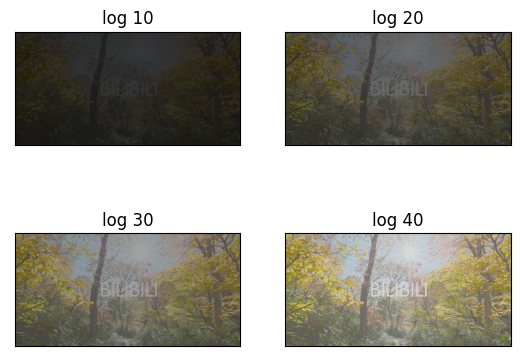

In [14]:
def log_transform(image,c):
    output_image = []
    for i in range(len(c)):
        tep =c[i]*np.log(image+1+1e-5)
        tep = np.uint8(tep+0.5) # 防止出现零的情况
        output_image.append(tep)
    return output_image

c_ = [10,20,30,40]
c_title = ['log '+ str(i) for i in c_]
img_log = log_transform(cv2.imread(img_path[0])[:,:,::-1],c_)
draw_image(2,2,img_log,c_title)

**5. 对上面的图片直接使用直方图均衡算法，并画出各个算法处理后图像的直方图，讨论哪个算法处理后的效果在视觉上比较好，可以从视觉直观效果和直方图等方面进行综合评价**

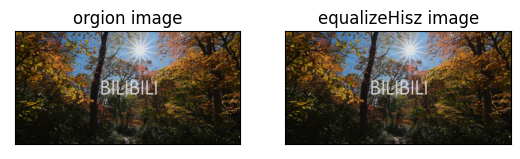

In [30]:
img_1 = cv2.imread(img_path[0])[:,:,::-1]
# 通道分割
r,g,b = cv2.split(img_1)
# 通道组合
img_2 = cv2.merge([r,g,b])

img = [img_1,img_2]
img_his_title =['orgion image','equalizeHisz image']
###
img_total =[img_add[0],img_subtract,img_add[1],img_gramm[2],img_log[1],img_2]
img_total_title = ['origin image','substarct','add alpha 0.2','gramma 1.5','log 20','equalizeHisz']
color = ['red','green','black','blue','pink','yellow']
####
draw_image(1,2,img,img_his_title)
def show_img_hist(row,col,img):
    for i in range(col*row):
        plt.subplot(row,col,i+1)
        plt.hist(img[i].ravel(),256,[0,256],color=color[i])
        plt.title(img_total_title[i])
        plt.xticks([])
        plt.yticks([])

**对比各个算法及其直方图**

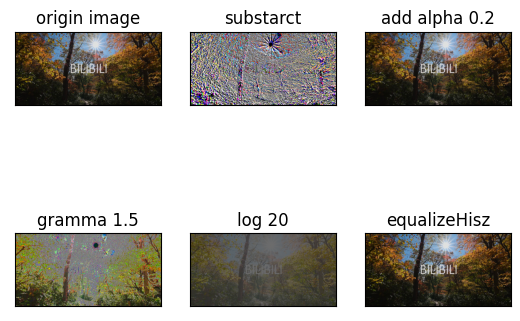

In [31]:
draw_image(2,3,img_total,img_total_title)

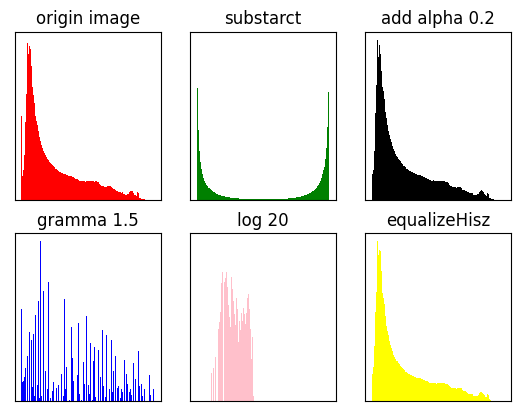

In [32]:
show_img_hist(2,3,img_total)